# Задача 51

# Импортируем библиотеки

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import torch.optim as optim
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib.colors import LightSource
from matplotlib import cm

# Загрузка данных

In [3]:
plt.rcParams['figure.figsize'] = 20, 12
plt.rcParams.update({'font.size': 27})
# загрузка данных

#X, y = datasets.load_diabetes(return_X_y=True)
X, y = datasets.make_regression(n_samples=10000, n_features= 4, n_informative= 3, noise=30)
N, d = X.shape
y = y / np.abs(np.max(y))
N, d

(10000, 4)

In [4]:
def get_coef(model, coef, x_data, y_data):
    model.set_params(alpha=coef)
    model.fit(x_data, y_data)
    return model.coef_

# Ridge model

In [5]:
#lambds = np.logspace(-5, 4, 500)
lambds = np.arange(0, 10000, 10)
y_ridge = []
er_ridge = []   
num_K = 20

for lam1 in lambds:
    coefs = []
    for k in range(num_K):
        b = np.random.choice(N, N//4)
        coefs.append(get_coef(Ridge(), lam1, X[b], y[b]))

    y_ridge.append(np.mean(coefs, axis = 0))
    er_ridge.append(np.var(coefs, axis = 0))



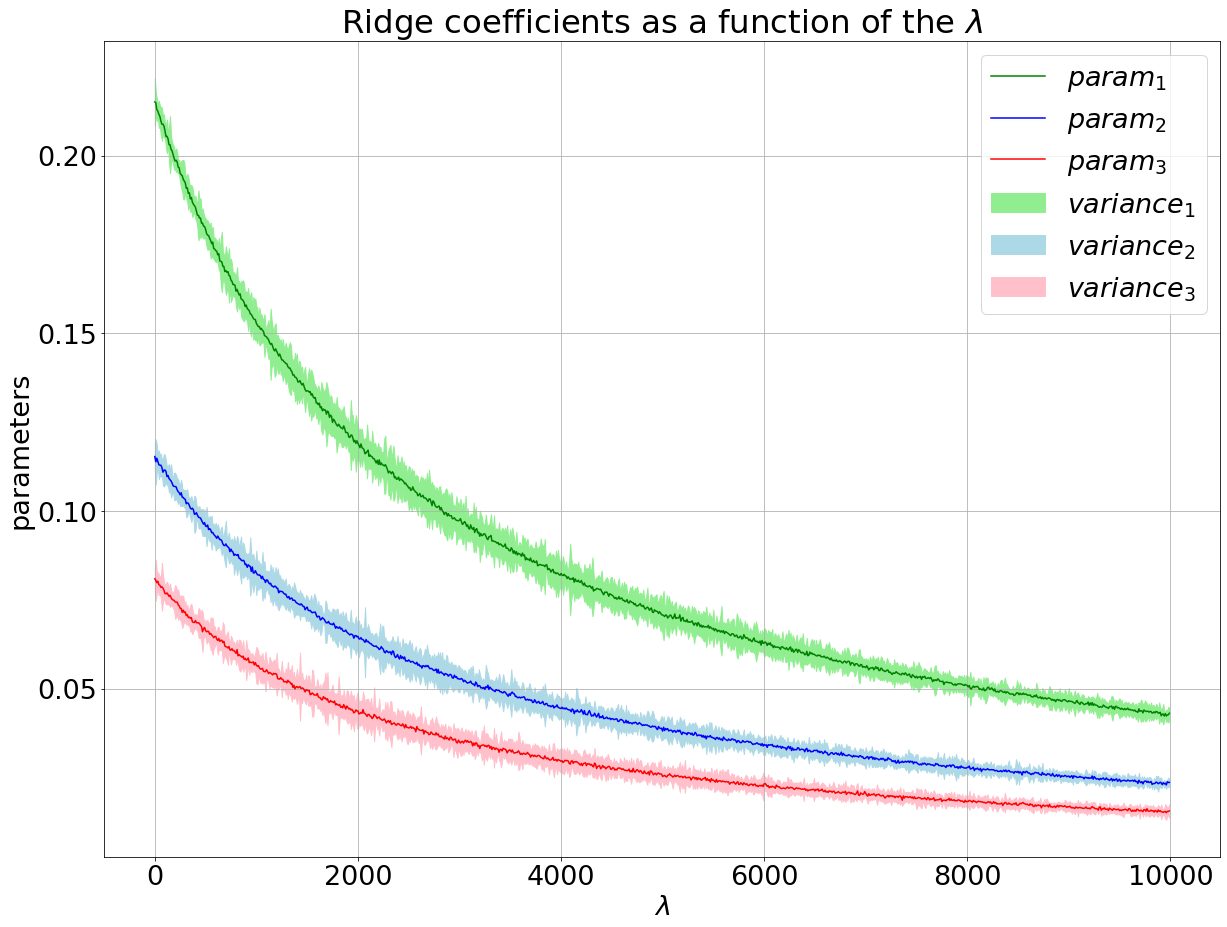

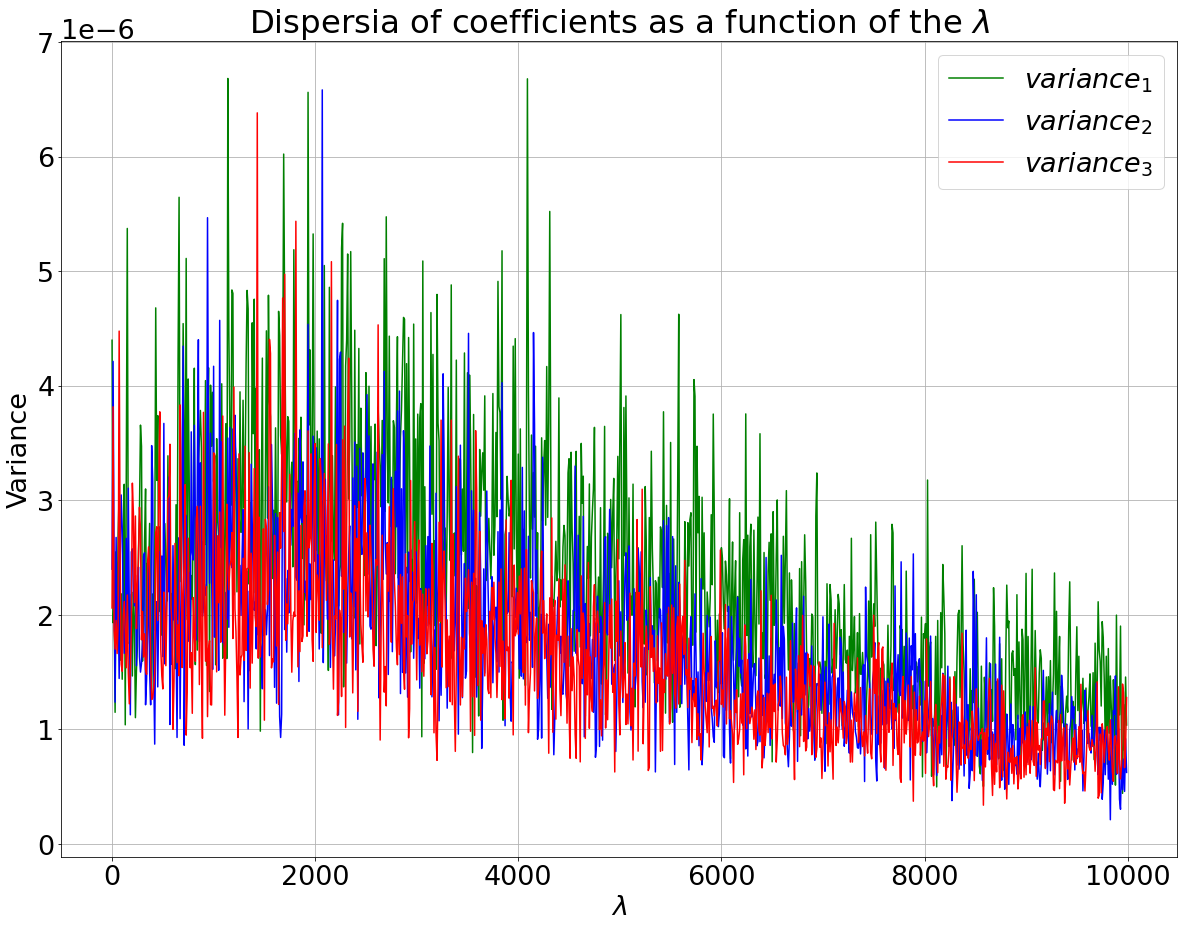

In [6]:
plt.figure(figsize=(20, 15))
plt.xlabel("$\lambda$")
plt.ylabel("parameters")
plt.title("Ridge coefficients as a function of the $\lambda$")
er_ridge = er_ridge
# red, green, blue (0, 2, 3)
# yellow
#plt.plot(lambds, np.array(y_ridge)[:, 0], c='blue', label='$param_0$')
plt.plot(lambds, np.array(y_ridge)[:, 1], c='g', label='$param_1$')
plt.plot(lambds, np.array(y_ridge)[:, 2], c='blue', label='$param_2$')
plt.plot(lambds, np.array(y_ridge)[:, 0], c='red', label='$param_3$')

#plt.fill_between(lambds, np.array(y_ridge)[:, 0] - np.array(er_ridge)[:, 0]*1000, np.array(y_ridge)[:, 0] + np.array(er_ridge)[:, 0]*1000, color='lightblue', label='$dispersia_0$')
plt.fill_between(lambds, np.array(y_ridge)[:, 1] - np.array(er_ridge)[:, 1]*1500, np.array(y_ridge)[:, 1] + np.array(er_ridge)[:, 1]*1500, color='lightgreen',  label='$variance_1$')
plt.fill_between(lambds, np.array(y_ridge)[:, 2] - np.array(er_ridge)[:, 2]*1500, np.array(y_ridge)[:, 2] + np.array(er_ridge)[:, 2]*1500, color='lightblue',   label='$variance_2$')
plt.fill_between(lambds, np.array(y_ridge)[:, 0] - np.array(er_ridge)[:, 0]*1500, np.array(y_ridge)[:, 0] + np.array(er_ridge)[:, 0]*1500, color='pink',        label='$variance_3$')
#plt.errorbar(lambds, np.array(y_ridge)[:, 2], xerr=0.001, yerr=np.array(er_ridge)[:,2] * 2000, c='g', ecolor='y')
#plt.errorbar(lambds, np.array(y_ridge)[:, 3], xerr=0.001, yerr=np.array(er_ridge)[:,3] * 2000, c='r', ecolor='y')
plt.grid()
plt.legend()
plt.savefig("1.png")
#plt.show()

plt.figure(figsize=(20, 15))
ax = plt.gca()
#ax.set_xscale("log")
plt.xlabel("$\lambda$")
plt.ylabel("Variance")
plt.title("Dispersia of coefficients as a function of the $\lambda$")
#plt.errorbar(lambds, y_ridge, xerr=0.5, yerr=er_ridge, c='g')
plt.plot(lambds, np.array(er_ridge)[:, 1], c='g',    label='$variance_1$')
plt.plot(lambds, np.array(er_ridge)[:, 2], c='blue', label='$variance_2$')
plt.plot(lambds, np.array(er_ridge)[:, 0], c='red',  label='$variance_3$')
plt.grid()
plt.legend()
plt.savefig("10.png")


# Model Lasso


In [11]:
#lambds = np.logspace(-7, 0, 500)
lambds = np.arange(0, 0.3, 0.001)
y_lasso = []
er_lasso = []

num_K = 20

for lam1 in lambds:
    coefs = []
    for k in range(num_K):
        b = np.random.choice(N, N//4)
        coefs.append(get_coef(Lasso(), lam1, X[b], y[b]))
    
    y_lasso.append(np.mean(coefs, axis = 0))
    er_lasso.append(np.power(np.var(coefs, axis = 0), 0.5))

<ipython-input-4-2a5594184ed5>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_data, y_data)
C:\Users\KreininMV\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\KreininMV\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.432695120324146, tolerance: 0.01727530766649429
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-2a5594184ed5>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_data, y_data)
C:\Users\KreininMV\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.

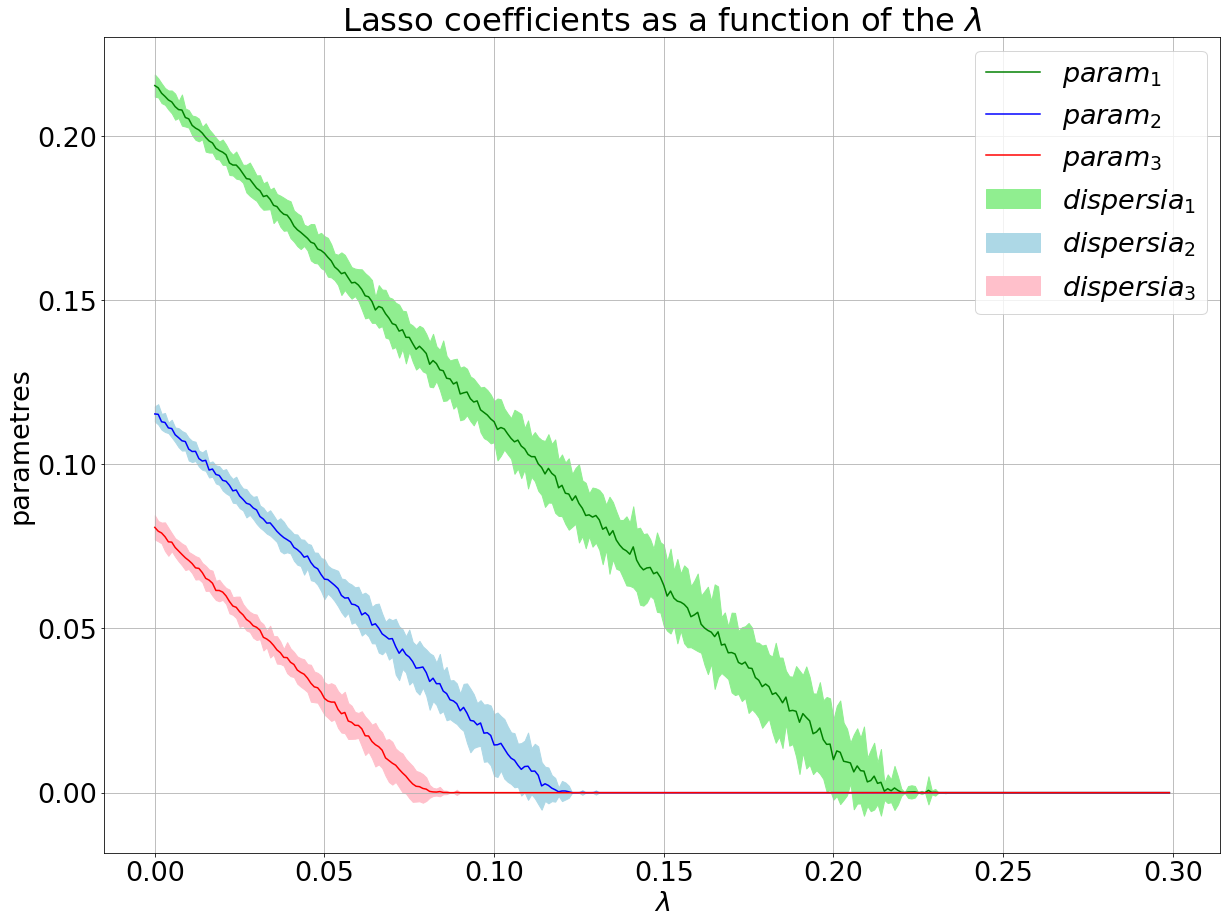

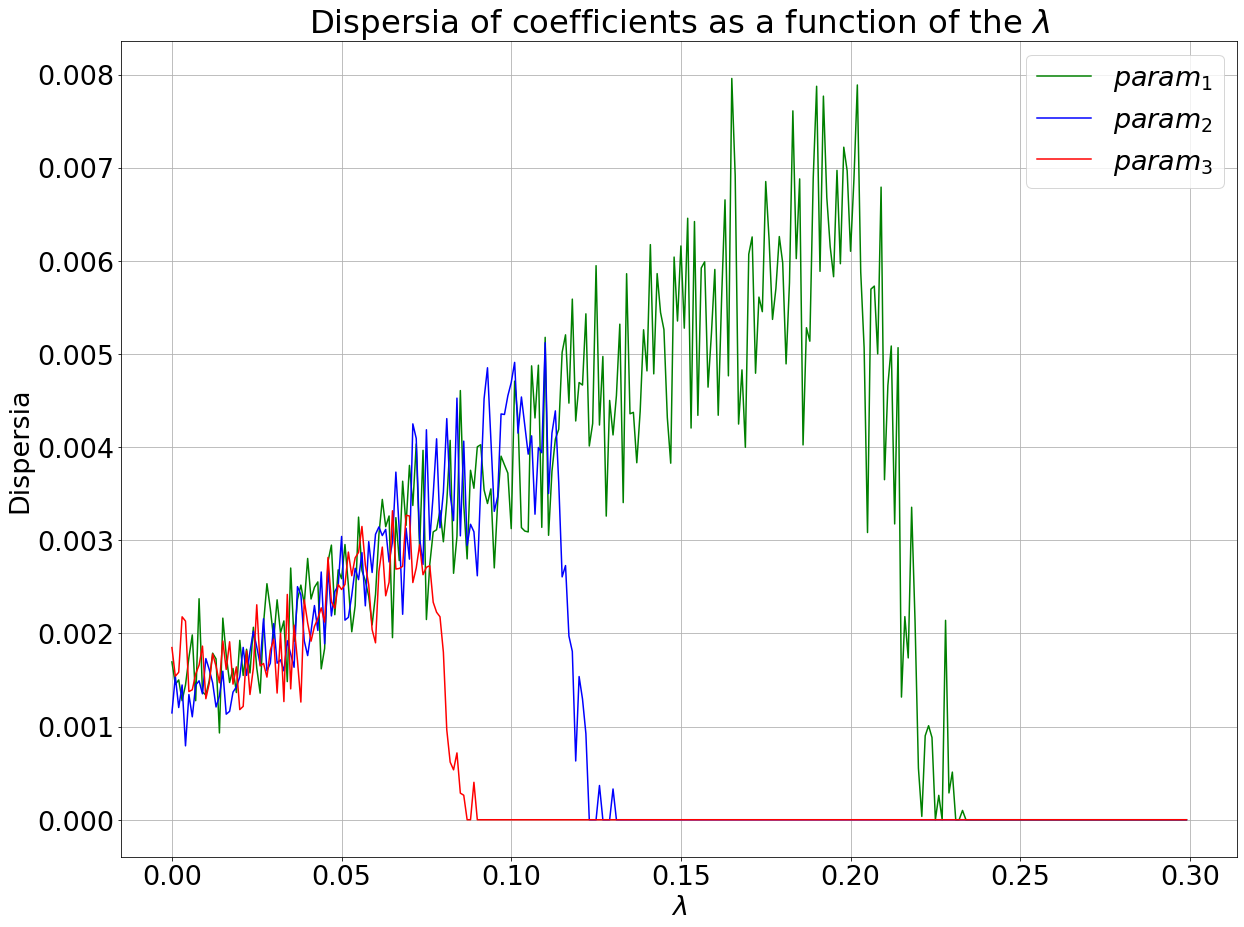

In [12]:
plt.figure(figsize=(20, 15))
plt.xlabel("$\lambda$")
plt.ylabel("parametres")
plt.title("Lasso coefficients as a function of the $\lambda$")
#plt.errorbar(lambds, np.array(y_lasso)[:, 0], xerr=0.001, yerr=np.array(er_lasso)[:,0] * 100, c='g')

# red, green, blue (0, 2, 3)
# yellow
plt.plot(lambds, np.array(y_lasso)[:, 1], c='g', label='$param_1$')
plt.plot(lambds, np.array(y_lasso)[:, 2], c='blue', label='$param_2$')
plt.plot(lambds, np.array(y_lasso)[:, 0], c='red', label='$param_3$')

#plt.fill_between(lambds, np.array(y_ridge)[:, 0] - np.array(er_ridge)[:, 0]*1000, np.array(y_ridge)[:, 0] + np.array(er_ridge)[:, 0]*1000, color='lightblue', label='$dispersia_0$')
plt.fill_between(lambds, np.array(y_lasso)[:, 1] - np.array(er_lasso)[:, 1]*2, np.array(y_lasso)[:, 1] + np.array(er_lasso)[:, 1]*2, color='lightgreen', label='$dispersia_1$')
plt.fill_between(lambds, np.array(y_lasso)[:, 2] - np.array(er_lasso)[:, 2]*2, np.array(y_lasso)[:, 2] + np.array(er_lasso)[:, 2]*2, color='lightblue', label='$dispersia_2$')
plt.fill_between(lambds, np.array(y_lasso)[:, 0] - np.array(er_lasso)[:, 0]*2, np.array(y_lasso)[:, 0] + np.array(er_lasso)[:, 0]*2, color='pink', label='$dispersia_3$')

plt.grid()
#plt.show()
plt.legend()
plt.savefig("2.png")

plt.figure(figsize=(20, 15))
ax = plt.gca()
#ax.set_xscale("log")
plt.xlabel("$\lambda$")
plt.ylabel("Dispersia")
plt.title("Dispersia of coefficients as a function of the $\lambda$")
#plt.errorbar(lambds, y_lasso, xerr=0.5, yerr=er_lasso, c='g')
#ax.plot(lambds, er_lasso)
plt.plot(lambds, np.array(er_lasso)[:, 1], c='g', label='$param_1$')
plt.plot(lambds, np.array(er_lasso)[:, 2], c='blue', label='$param_2$')
plt.plot(lambds, np.array(er_lasso)[:, 0], c='red', label='$param_3$')
plt.grid()
plt.legend()
plt.savefig("20.png")

# Elastic net

In [9]:
model_elnet = ElasticNet() # ElasticNet

lam_1 = np.logspace(-5, 1, 100)
lam_2 = np.logspace(-7, -0.8, 100)
#lam_1 = np.arange(0, 0.3, 0.003)
#lam_2 = np.arange(0, 10, 0.1)
num_param = len(lam_1)
num_k = 20
x_elnet, y_elnet = np.meshgrid(lam_1, lam_2)
z_elnet = np.zeros((num_param, num_param))
er_elnet = np.zeros((num_param, num_param))

for i in range(num_param):
    for j in range(num_param):
        coefs = []
        
        for k in range(num_K):
            b = np.random.choice(N, N//3)
            model_elnet.set_params(alpha = y_elnet[i][j] + x_elnet[i][j], l1_ratio= y_elnet[i][j]/(y_elnet[i][j] + x_elnet[i][j]))
            model_elnet.fit(X[b], y[b])
            coefs.append(model_elnet.coef_)
    
        z_elnet[i][j] = np.mean(coefs[2], axis = 0)
        er_elnet[i][j] = np.power(np.var(coefs[2], axis = 0), 0.5)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


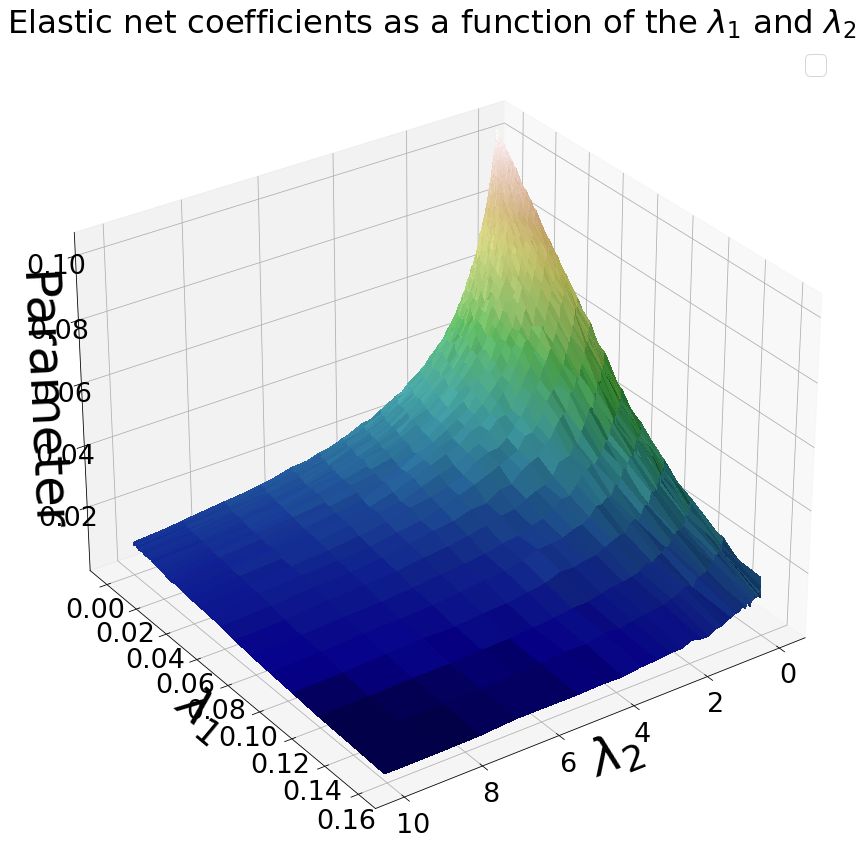

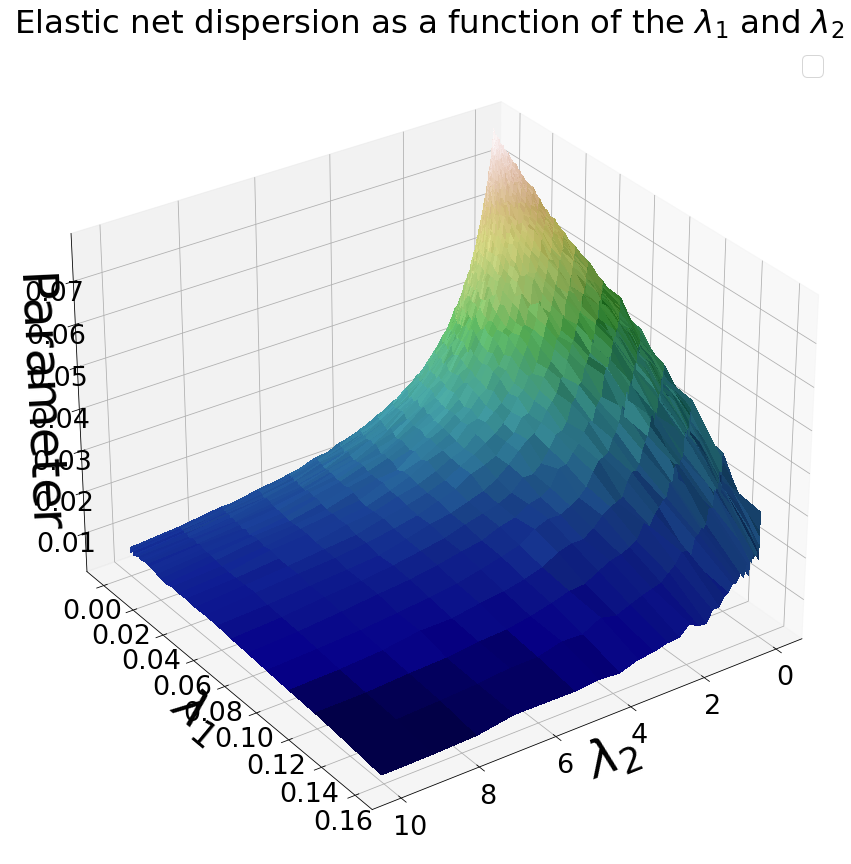

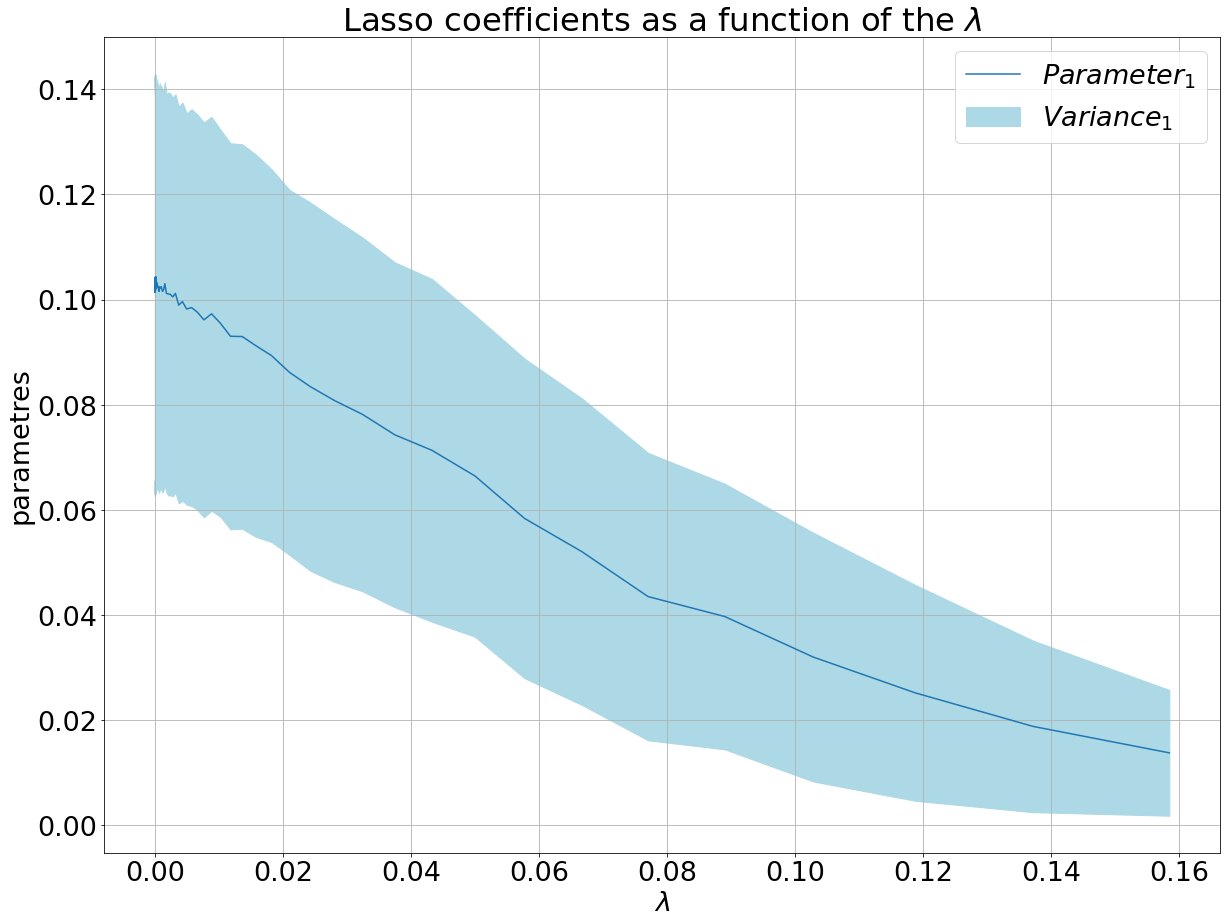

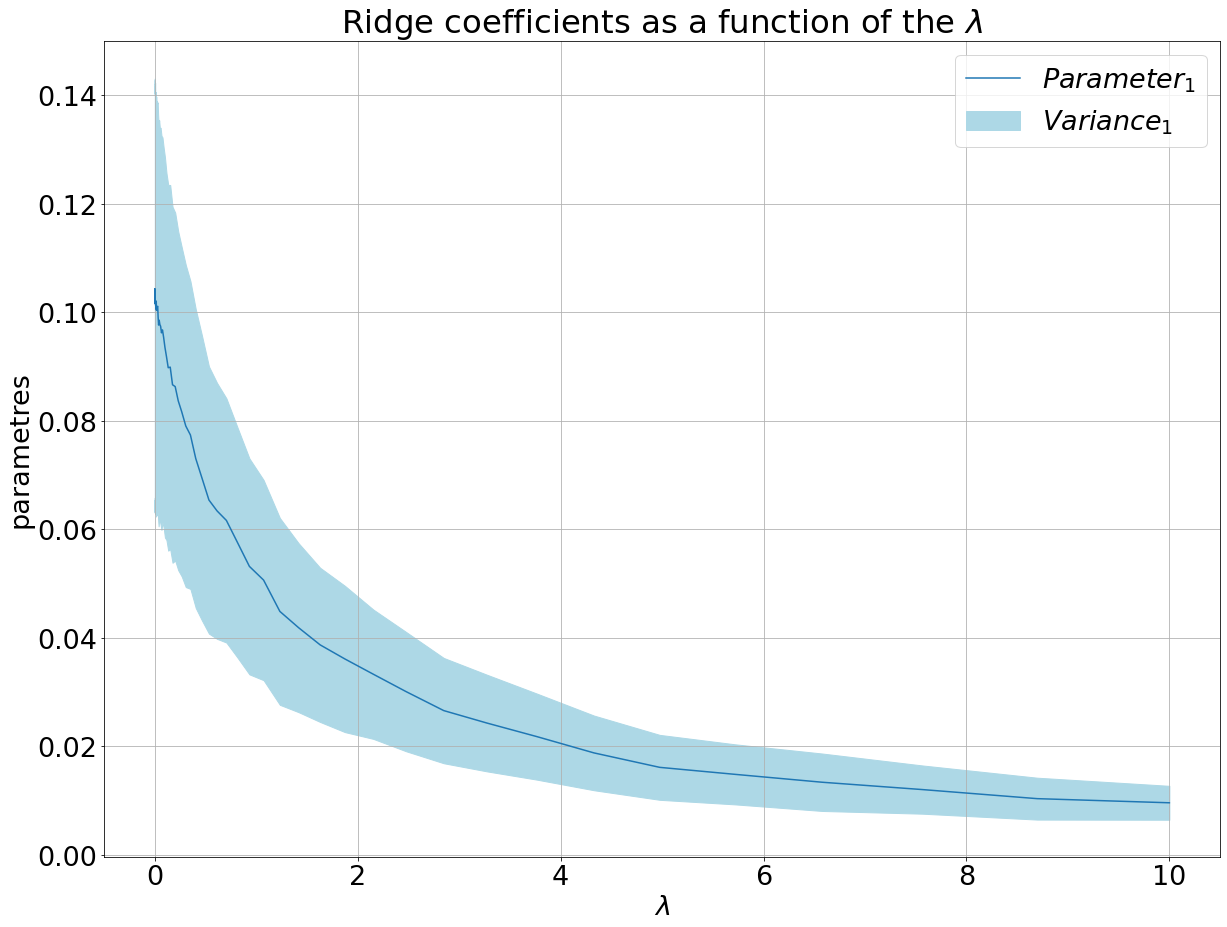

In [14]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')

#ax.plot_surface(x_elnet, y_elnet, z_elnet, label='parameter', cmap='binary')
ls = LightSource(30, 55)
rgb = ls.shade(z_elnet, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
ax.plot_surface(x_elnet, y_elnet, z_elnet, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False, shade=False)
plt.title("Elastic net coefficients as a function of the $\lambda_1$ and $\lambda_2$")
ax.set_xlabel('$\lambda_2$', fontsize=50)
ax.set_ylabel('$\lambda_1$',  fontsize=50)

ax.set_zlabel('Parameter', fontsize=50)
ax.set_label('Parameter')
#ax.set_xlim(0, 8)
#ax.set_ylim(0, 0.5)
#ax.set_zlim(0, 0.15)

#fill_between_3d(ax, *set1, *set2, mode = 1)
#ax.plot_surface(x_elnet, y_elnet, z_elnet + er_elnet)
#ax.plot_surface(x_elnet, y_elnet, z_elnet - er_elnet)
ax.view_init(30, 55)
plt.legend()
plt.savefig("30.png")

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')

#ax.plot_surface(x_elnet, y_elnet, z_elnet, label='parameter', cmap='binary')
ls = LightSource(30, 55)
rgb = ls.shade(z_elnet, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
ax.plot_surface(x_elnet, y_elnet, er_elnet, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False, shade=False)
plt.title("Elastic net dispersion as a function of the $\lambda_1$ and $\lambda_2$")
ax.set_xlabel('$\lambda_2$', fontsize=50)
ax.set_ylabel('$\lambda_1$',  fontsize=50)
ax.set_zlabel('Parameter', fontsize=50)
ax.set_label('Parameter')

ax.view_init(30, 55)
plt.legend()
plt.savefig("33.png")




plt.figure(figsize=(20, 15))
plt.xlabel("$\lambda$")
plt.ylabel("parametres")
plt.title("Lasso coefficients as a function of the $\lambda$")
#plt.errorbar(lam_1, z_elnet[:, 0],  yerr=er_elnet[:, 0], c='g')
plt.fill_between(lam_2, np.array(z_elnet)[:,0] - np.array(er_elnet)[:, 0] * 0.5, np.array(z_elnet)[:, 0] + np.array(er_elnet)[:,0]* 0.5, color='lightblue', label='$Variance_1$')
plt.plot(lam_2, z_elnet[:, 0], label='$Parameter_1$')
plt.grid()
plt.legend()
plt.savefig("31.png")

plt.figure(figsize=(20, 15))
plt.xlabel("$\lambda$")
plt.ylabel("parametres")
plt.title("Ridge coefficients as a function of the $\lambda$")
#plt.errorbar(lam_2, z_elnet[0, :],  yerr=er_elnet[0, :], c='g')
plt.fill_between(lam_1, np.array(z_elnet)[0,:] - np.array(er_elnet)[0, :] * 0.5, np.array(z_elnet)[0, :] + np.array(er_elnet)[0,:]* 0.5, color='lightblue', label='$Variance_1$')
plt.plot(lam_1, z_elnet[0, :], label='$Parameter_1$')
plt.grid()
plt.legend()
plt.savefig("32.png")